## 소켓 통신

### simple exanple

In [1]:
import socket
with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:  # 소켓 s를 엶
    s.connect(('www.google.com', 80))  # www.google.com 이라는 호스트의 80번 포트에 접속
    cmd = 'GET http://www.google.com HTTP/1.0\r\n\r\n'.encode()
    s.send(cmd)  # 접속이 되면 GET xxxxx 형식의 HTTP 프로토콜로 된 명령을 전송
    data = s.recv(1024)  # 1024 바이트만큼의 HTTP 응답을 수신

print('Received ', data)

Received  b'HTTP/1.0 404 Not Found\r\nContent-Type: text/html; charset=UTF-8\r\nDate: Wed, 19 Aug 2020 07:22:22 GMT\r\nServer: gws\r\nContent-Length: 1561\r\nX-XSS-Protection: 0\r\nX-Frame-Options: SAMEORIGIN\r\n\r\n<!DOCTYPE html>\n<html lang=en>\n  <meta charset=utf-8>\n  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">\n  <title>Error 404 (Not Found)!!1</title>\n  <style>\n    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-re

## 날씨 API
- One Call API doc : https://openweathermap.org/api/one-call-api

In [6]:
import requests
myapi = "af44a23b3fa31260fd92b236a65bffa3"
# myapi = "00101609641a00512c66545541ff3c1e"

def makeurl(lat, lon):
    url = f'https://api.openweathermap.org/data/2.5/onecall?lat={lat}&lon={lon}&appid={myapi}'
    return url

response = requests.get(makeurl(37,127))
weather = response.json()
weather

{'lat': 37,
 'lon': 127,
 'timezone': 'Asia/Seoul',
 'timezone_offset': 32400,
 'current': {'dt': 1597826906,
  'sunrise': 1597783934,
  'sunset': 1597832362,
  'temp': 304.15,
  'feels_like': 305.5,
  'pressure': 1009,
  'humidity': 58,
  'dew_point': 294.92,
  'uvi': 9.63,
  'clouds': 1,
  'visibility': 6437,
  'wind_speed': 4.6,
  'wind_deg': 290,
  'weather': [{'id': 721,
    'main': 'Haze',
    'description': 'haze',
    'icon': '50d'}]},
 'minutely': [{'dt': 1597826940, 'precipitation': 0},
  {'dt': 1597827000, 'precipitation': 0},
  {'dt': 1597827060, 'precipitation': 0},
  {'dt': 1597827120, 'precipitation': 0},
  {'dt': 1597827180, 'precipitation': 0},
  {'dt': 1597827240, 'precipitation': 0},
  {'dt': 1597827300, 'precipitation': 0},
  {'dt': 1597827360, 'precipitation': 0},
  {'dt': 1597827420, 'precipitation': 0},
  {'dt': 1597827480, 'precipitation': 0},
  {'dt': 1597827540, 'precipitation': 0},
  {'dt': 1597827600, 'precipitation': 0},
  {'dt': 1597827660, 'precipitation'

## 웹 크롤링

In [7]:
# 페이지 접속하는 함수
import urllib
def download(url):
    return urllib.request.urlopen(url)

In [8]:
# 접속 시 에러를 핸들링
from urllib.error import URLError, HTTPError, ContentTooShortError

def download(url):
    try:
        html = urllib.request.urlopen(url)
    except (URLError, HTTPError, ContentTooShortError) as e:
        print('Download error', e.reason)
        html = None
    return html

download('http://www.google.com')

- urlopen() : http로된 url만 열 수 있음
- https://docs.python.org/3/library/urllib.request.html#module-urllib.request

In [10]:
def download(url):
    try:
        html = urllib.request.urlopen(url).read()
    except (URLError, HTTPError, ContentTooShortError) as e:
        print('Download error', e.reason)
        html = None
    return html

In [11]:
download('https://www.google.com')

b'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="ko"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="Oi+ajd7NvZ0wHUS4ofzF7A==">(function(){window.google={kEI:\'rOo8X9PQH4yvmAXUpaWwBw\',kEXPI:\'0,202123,3,4,32,4,31,1151550,5662,730,224,3110,1994,207,3204,10,1226,364,1499,611,92,114,383,246,5,1184,170,648,3451,315,3,65,594,391,91,41,13,118,20,111,224,530,30,83,98,1,172,593,188,151,1119835,1197744,532,328991,13677,4855,32691,15248,867,28684,9188,8384,4859,1361,9290,3026,2819,1923,11033,1808,4020,978,7931,5297,2054,920,2090,1085,1890,2785,3645,7432,5292,1804,4520,2774,919,261,2016,8,87,2709,1593,1279,2212,530,149,1103,840,517,1469,53,4258,108,204,1137,2,2669,2023,1777,520,1947,2219,3,100,328,1286,14,2927,2246,1813,1787,2273,1,953,2845,8,6067,6286,4454,642,2450,3684,1742,4929,108,2854,553,908,2,941,2614,2397,

- pip 설치

      $ pip install bs4
$ pip install requests

- https://www.crummy.com/software/BeautifulSoup/bs4/doc/

In [12]:
import requests
url = 'https://www.google.com'
response = requests.get(url)
response

<Response [200]>

In [13]:
def download2(url):
    try:
        response = requests.get(url)
        html = response.text  # HTML을 반환
    except requests.ConnectionError:
        print('Connection error')
        html = None
    return html

download2(url)

'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="ko"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="27Q53b6EwY/NLZcMFfydog==">(function(){window.google={kEI:\'U-s8X7DtFfTRmAXin66oAw\',kEXPI:\'0,202123,3,4,32,4,30,570823,580727,5663,731,223,5104,207,2414,790,10,1226,364,1499,612,205,383,246,5,1129,225,648,3451,315,3,543,116,392,90,47,124,22,111,269,484,30,85,105,83,81,301,292,380,1119794,1197727,317333,12207,13677,4855,32692,15247,867,28684,9188,8384,4858,1362,9291,3028,4739,11033,1808,4020,978,7931,5297,2054,920,873,1217,2975,6430,14528,4516,1397,1381,919,2277,8,85,2711,1593,1279,2212,530,149,1103,840,520,1519,157,4101,312,1137,2,2669,2023,1777,522,1944,246,1984,93,328,1284,16,2927,2247,1812,1787,3227,2847,5,5599,469,6286,4455,641,2449,3685,1742,4929,108,3407,908,2,941,715,1899,2398,7467,2179,1098,3,346,

### 웹페이지 분석

In [14]:
import requests
from bs4 import BeautifulSoup
html = requests.get(url)
soup = BeautifulSoup(html.text, 'html.parser')

In [15]:
soup.html.body

<body bgcolor="#fff"><script nonce="9g2WRamFKH7F4U4uHCANLw==">(function(){var src='/images/nav_logo229.png';var iesg=false;document.body.onload = function(){window.n && window.n();if (document.images){new Image().src=src;}
if (!iesg){document.f&&document.f.q.focus();document.gbqf&&document.gbqf.q.focus();}
}
})();</script><div id="mngb"><div id="gbar"><nobr><b class="gb1">검색</b> <a class="gb1" href="https://www.google.co.kr/imghp?hl=ko&amp;tab=wi">이미지</a> <a class="gb1" href="https://maps.google.co.kr/maps?hl=ko&amp;tab=wl">지도</a> <a class="gb1" href="https://play.google.com/?hl=ko&amp;tab=w8">Play</a> <a class="gb1" href="https://www.youtube.com/?gl=KR&amp;tab=w1">YouTube</a> <a class="gb1" href="https://news.google.com/?tab=wn">뉴스</a> <a class="gb1" href="https://mail.google.com/mail/?tab=wm">Gmail</a> <a class="gb1" href="https://drive.google.com/?tab=wo">드라이브</a> <a class="gb1" href="https://www.google.co.kr/intl/ko/about/products?tab=wh" style="text-decoration:none"><u>더보기</u> »</

In [16]:
soup = BeautifulSoup("<span>Wow it's so good!!</span>", 'html.parser')
soup.span

<span>Wow it's so good!!</span>

In [17]:
# ''', """ 는 여러줄의 문자열을 입력할 때 사용
html='''<title>Fundamental</title> 
         <body>
          <p id='programming'>python</p> 
          <p id='programming'>java</p> 
          <p id='algorithm'>algorithm</p> 
          <p id='fundamental'>math</p> 
          <p id='programming'>C++</p> 
          </body>'''
soup = BeautifulSoup(html, 'html.parser')
soup.findAll({'p'})

[<p id="programming">python</p>,
 <p id="programming">java</p>,
 <p id="algorithm">algorithm</p>,
 <p id="fundamental">math</p>,
 <p id="programming">C++</p>]

In [18]:
soup.findAll('p', id='programming')

[<p id="programming">python</p>,
 <p id="programming">java</p>,
 <p id="programming">C++</p>]

### 환율 가져오기

- 크롤링 사이트 : https://m.stock.naver.com/marketindex/index.nhn

In [21]:
from bs4 import BeautifulSoup
import requests

#URL 가져오기
url = 'https://m.stock.naver.com/marketindex/index.nhn'
response = requests.get(url)

#Soup 객체 생성
soup = BeautifulSoup(response.text, 'html.parser')

#원하는 데이터 추출 - 국가
country = []
country_1 = soup.findAll('strong')
country_2 = soup.findAll('span', {'class':'stock_item'})
for c in country_1:
    country.append(c.text)
for c in country_2:
    country.append(c.text)
country.remove('컨텐츠 제공업체')
country.remove('증권')

#원하는 데이터 추출 - 환율정보
price = []
price_0 = soup.findAll('span', {"class":"stock_price"})
for p in price_0:
    price.append(p.text)

#데이터 정렬, (pandas)
import pandas as pd
data = {}
for i in range(len(country)):
    data[country[i]] = price[i]

pd.Series(data)

미국USD          1,179.50
유럽EUR          1,408.50
일본JPY          1,119.34
중국CNY            170.91
국제금            1,999.40
유가WTI             42.89
달러인덱스             92.25
남아프리카 ZAR         68.37
노르웨이 NOK         133.64
뉴질랜드 NZD         782.78
대만 TWD            40.17
덴마크 DKK          189.18
러시아 RUB           16.10
말레이지아 MYR        282.48
멕시코 MXN           53.33
몽골 MNT             0.41
미국 USD         1,179.50
바레인 BHD        3,128.73
방글라데시 BDT         13.91
베트남 VND 100        5.09
브라질 BRL          215.74
브루나이 BND         865.05
사우디 SAR          314.49
스웨덴 SEK          136.62
스위스 CHF        1,307.07
싱가포르 SGD         865.05
아랍에미 AED         321.11
영국 GBP         1,562.48
오만 OMR         3,067.62
요르단 JOD        1,663.61
유럽연합 EUR       1,408.50
이스라엘 ILS         346.90
이집트 EGP           73.97
인도 INR            15.77
인도네시아 IDR          8.00
일본 JPY 100     1,119.34
중국원화 CNY         170.91
체코 CZK            53.94
칠레 CLP             1.48
카자흐스탄 KZT          2.82
카타르 QAR          323.95
캐나다 CAD         

### 로그인 하기

- https://www.youtube.com/watch?v=OpoVuwxGRDI
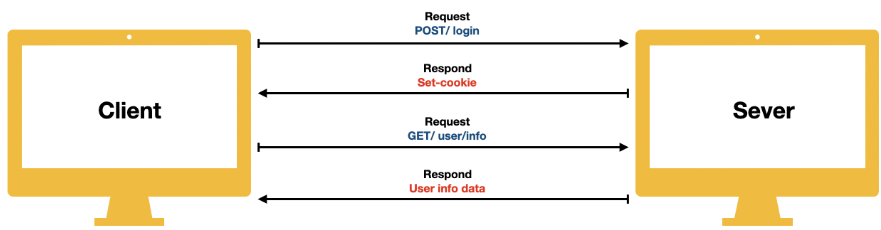

In [25]:
session = requests.session()

log_info = {'id': '',
           'pw': ''}
url = 'https://nid.naver.com/nidlogin.login'
response = session.post(url, data=log_info)

url_mypage = 'https://nid.naver.com/user2/help/myInfo.nhn?lang=ko_KR'
response = session.get(url_mypage)

soup = BeautifulSoup(response.text, 'html.parser')

soup.find('span')

<span>본문으로 바로가기</span>

- 보안상 이유로 크롤링으로 로그인 안됨
- PHP서버에서 로그인할 떄 사용 가능